In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
import sklearn

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid',palette='muted',font_scale=1.5)

rcParams['figure.figsize'] = 22,10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
df = pd.read_csv("manual_30min_norm.csv", parse_dates=['TIME'],index_col='TIME')

In [3]:
df.head()

,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
TIME,,,,,,,
2013-09-16 00:00:00,1.000000,0.538461,0.538461,0.123077,0.123077,0.142857,1379289600
2013-09-16 00:30:00,0.999475,0.538416,0.538416,0.123077,0.122985,0.143787,1379291400
2013-09-16 01:00:00,0.998950,0.538370,0.538370,0.123077,0.122894,0.144717,1379293200
2013-09-16 01:30:00,0.998424,0.538324,0.538324,0.123077,0.122802,0.145647,1379295000
2013-09-16 02:00:00,0.997899,0.538278,0.538278,0.123077,0.122711,0.146577,1379296800


In [4]:
df.index

DatetimeIndex(['2013-09-16 00:00:00', '2013-09-16 00:30:00',
               '2013-09-16 01:00:00', '2013-09-16 01:30:00',
               '2013-09-16 02:00:00', '2013-09-16 02:30:00',
               '2013-09-16 03:00:00', '2013-09-16 03:30:00',
               '2013-09-16 04:00:00', '2013-09-16 04:30:00',
               ...
               '2020-07-01 19:30:00', '2020-07-01 20:00:00',
               '2020-07-01 20:30:00', '2020-07-01 21:00:00',
               '2020-07-01 21:30:00', '2020-07-01 22:00:00',
               '2020-07-01 22:30:00', '2020-07-01 23:00:00',
               '2020-07-01 23:30:00', '2020-08-01 00:00:00'],
              dtype='datetime64[ns]', name='TIME', length=110641, freq=None)

In [5]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [6]:
df.head()

,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH,hour,day_of_month,day_of_week,month
TIME,,,,,,,,,,,
2013-09-16 00:00:00,1.000000,0.538461,0.538461,0.123077,0.123077,0.142857,1379289600,0,16,0,9
2013-09-16 00:30:00,0.999475,0.538416,0.538416,0.123077,0.122985,0.143787,1379291400,0,16,0,9
2013-09-16 01:00:00,0.998950,0.538370,0.538370,0.123077,0.122894,0.144717,1379293200,1,16,0,9
2013-09-16 01:30:00,0.998424,0.538324,0.538324,0.123077,0.122802,0.145647,1379295000,1,16,0,9
2013-09-16 02:00:00,0.997899,0.538278,0.538278,0.123077,0.122711,0.146577,1379296800,2,16,0,9


In [7]:
df = df.drop(columns=['EPOCH'])

In [8]:
df.describe()

,FM1,PE1,PE2,PE3,PE4,TP1,hour,day_of_month,day_of_week,month
count,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000,110641.000000
mean,0.468309,0.561586,0.585491,0.524408,0.399311,0.396514,11.499896,15.803771,2.996981,6.640793
std,0.258924,0.059871,0.040076,0.125889,0.125387,0.080811,6.922273,8.756923,1.999898,3.471396
min,0.000000,0.461538,0.138462,0.123077,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.264587,0.511218,0.553846,0.553846,0.373054,0.368676,5.000000,8.000000,1.000000,4.000000
50%,0.410539,0.534982,0.600000,0.568292,0.439034,0.383929,11.000000,16.000000,3.000000,7.000000
75%,0.631303,0.615385,0.615385,0.584615,0.476923,0.405506,17.000000,23.000000,5.000000,10.000000
max,1.000000,1.000000,0.646154,0.676923,0.615385,1.000000,23.000000,31.000000,6.000000,12.000000


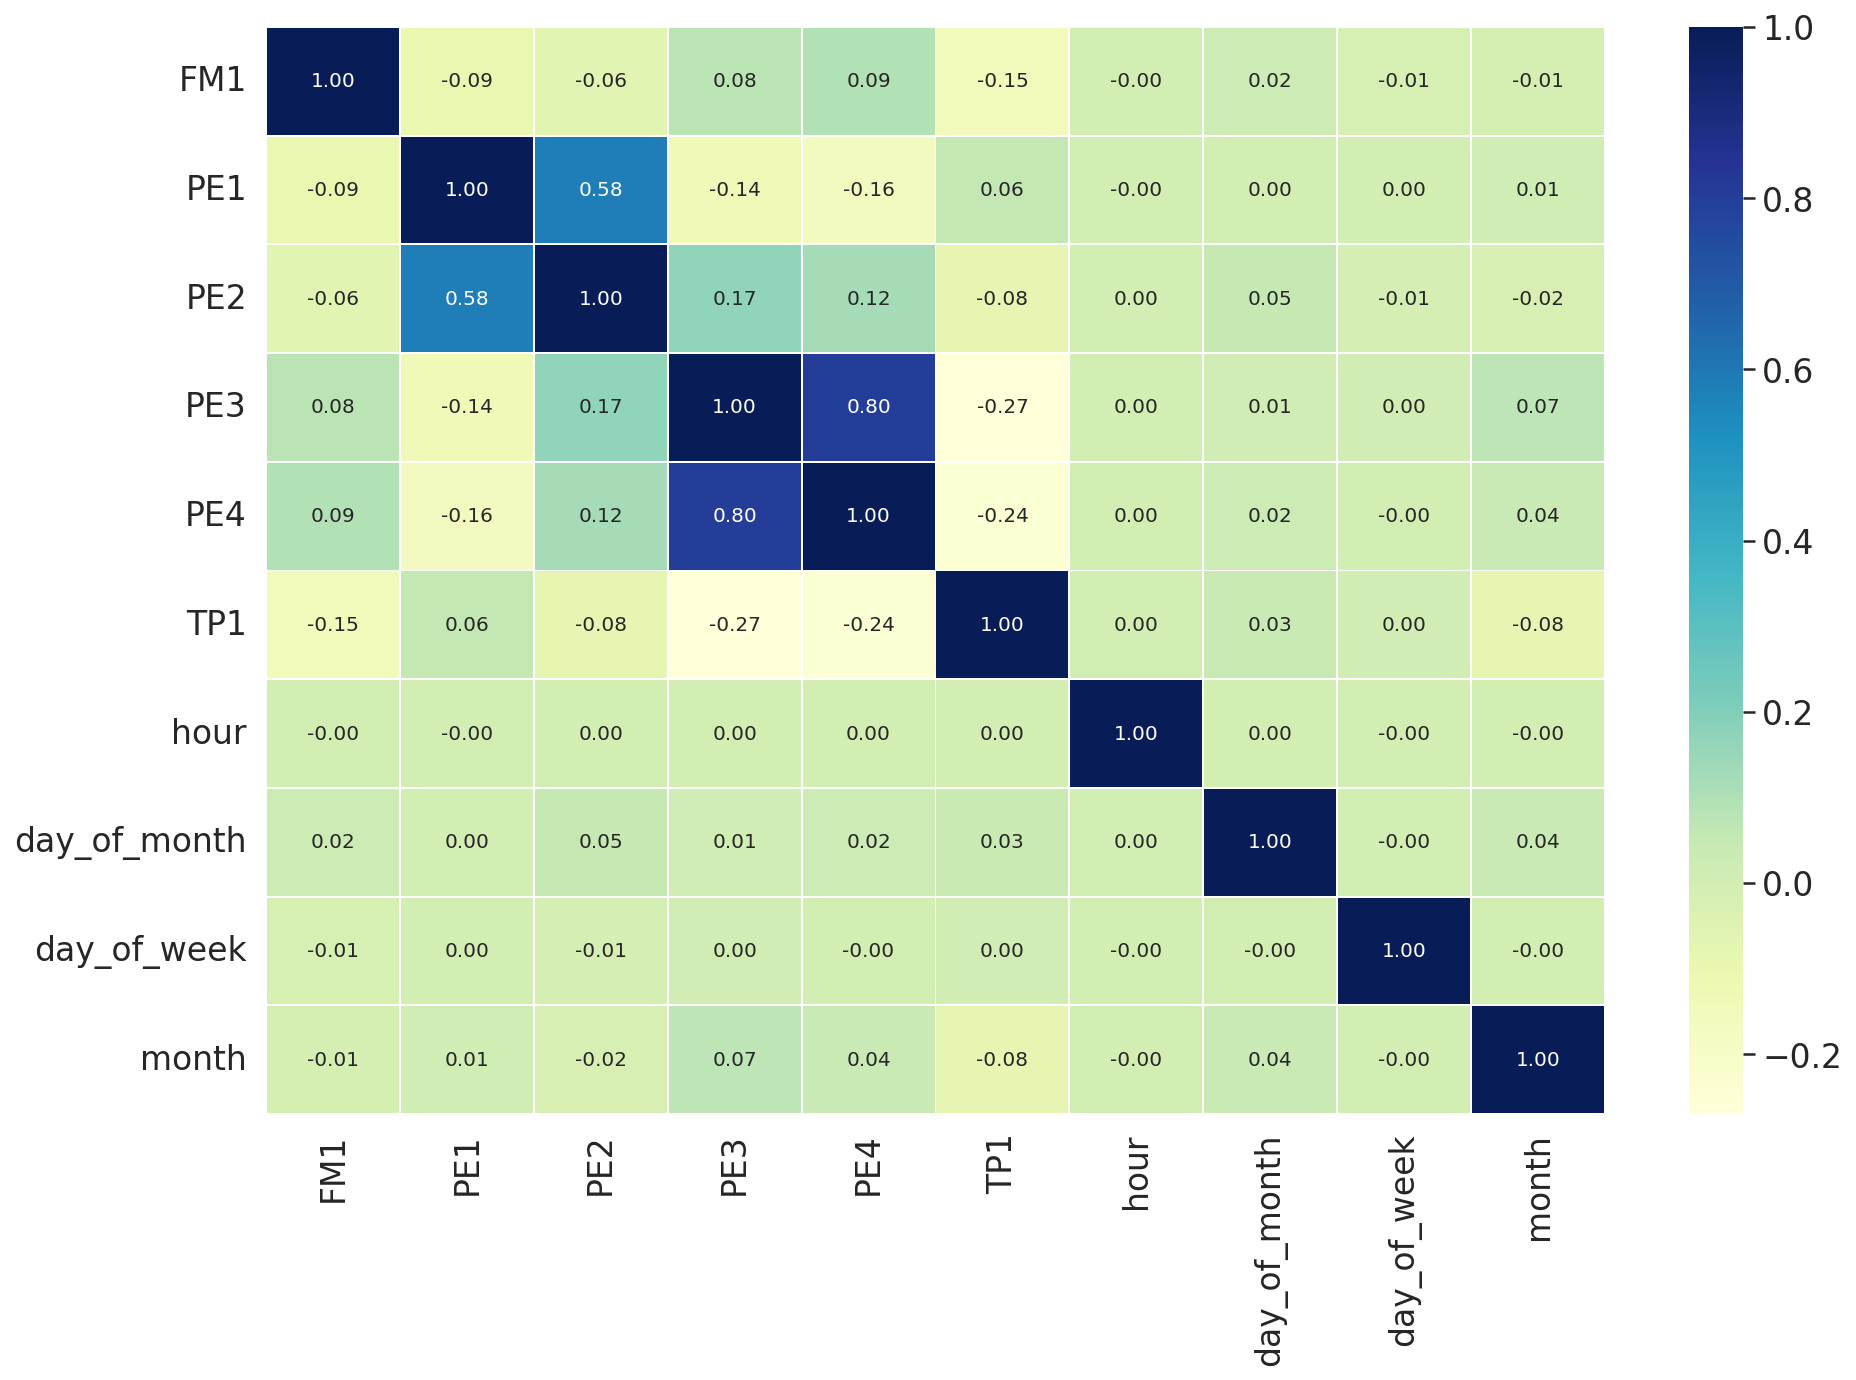

In [9]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

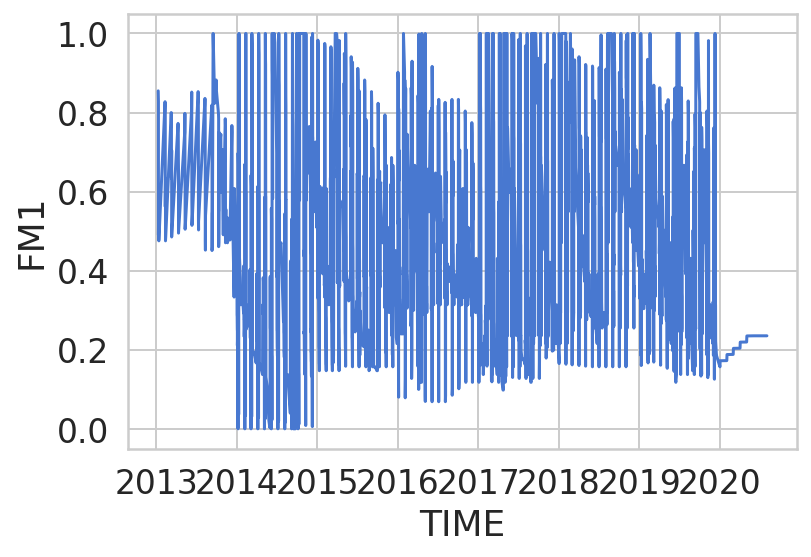

In [10]:
sns.lineplot(x=df.index,y='FM1',data=df);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 110641 entries, 2013-09-16 00:00:00 to 2020-08-01 00:00:00
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FM1           110641 non-null  float64
 1   PE1           110641 non-null  float64
 2   PE2           110641 non-null  float64
 3   PE3           110641 non-null  float64
 4   PE4           110641 non-null  float64
 5   TP1           110641 non-null  float64
 6   hour          110641 non-null  int64  
 7   day_of_month  110641 non-null  int64  
 8   day_of_week   110641 non-null  int64  
 9   month         110641 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 9.3 MB


In [12]:
df1 = df.copy()

In [13]:
df1.month = df1.month.astype(str)
df1.day_of_month = df1.day_of_month.astype(str)

Text(0, 0.5, 'FM1')

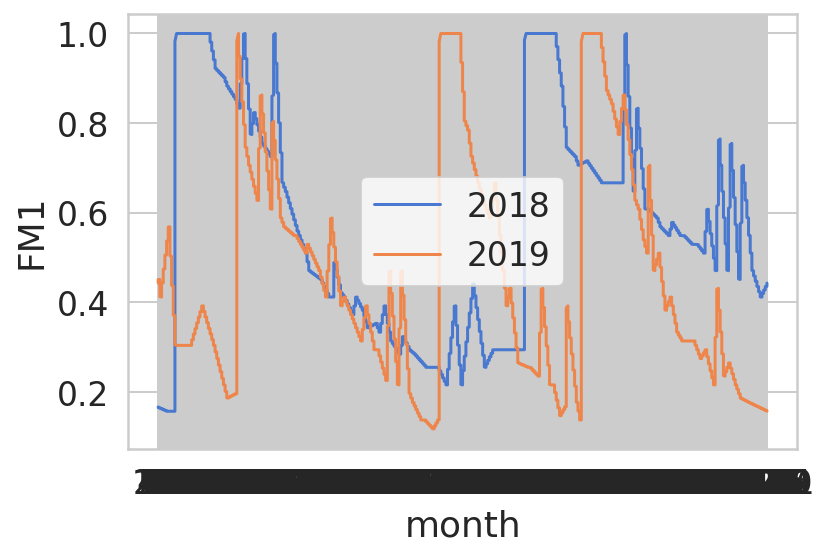

In [14]:
df_2018 = df1['2018'].reset_index()
df_2019 = df1['2019'].reset_index()
df_2018['month_day'] = df_2018.apply(lambda x : str(x['month'])+"-"+x['day_of_month'],axis=1)
df_2019['month_day'] = df_2019.apply(lambda x : str(x['month'])+"-"+x['day_of_month'],axis=1)
plt.plot(df_2018['month_day'],df_2018['FM1'])
plt.plot(df_2019['month_day'],df_2019['FM1'])
plt.legend(['2018','2019'])
plt.xlabel('month')
plt.ylabel('FM1')

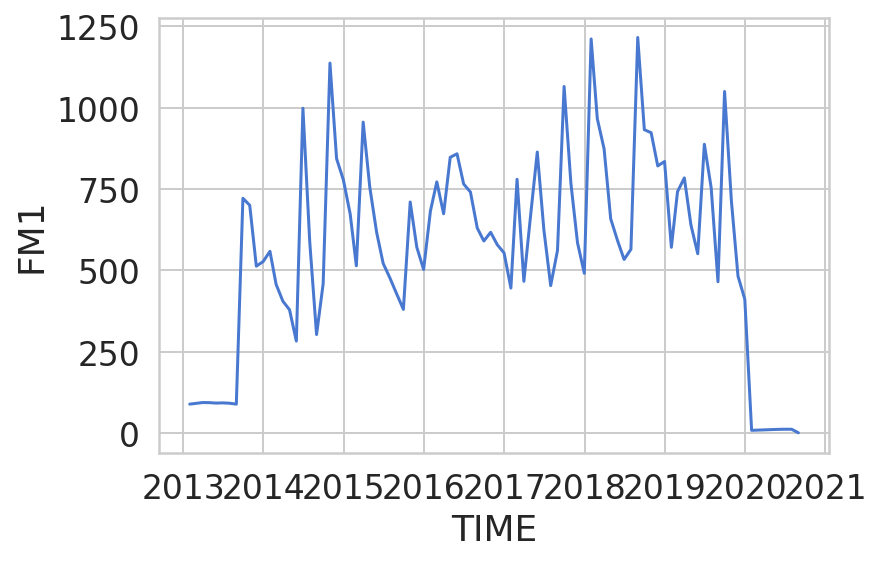

In [15]:
df_by_month = df.resample('M').sum()
sns.lineplot(x=df_by_month.index,y='FM1',data=df_by_month);

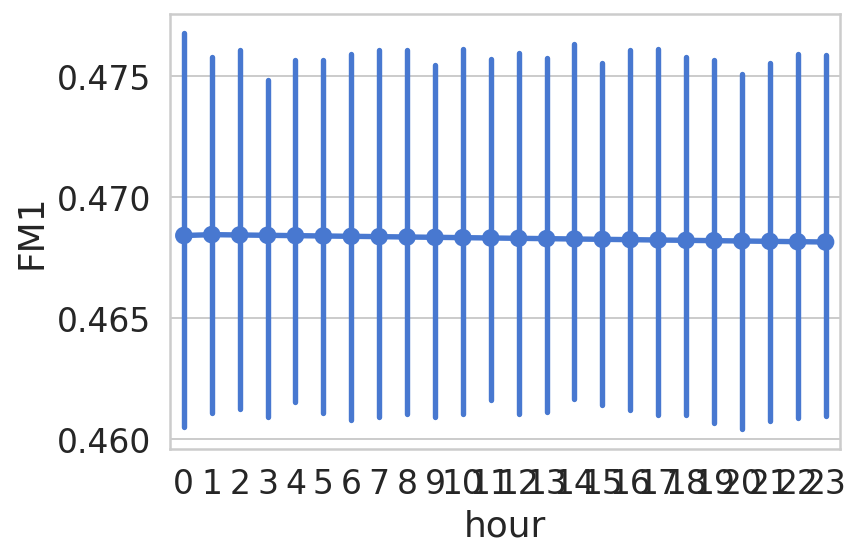

In [16]:
sns.pointplot(data=df,x = 'hour',y='FM1');

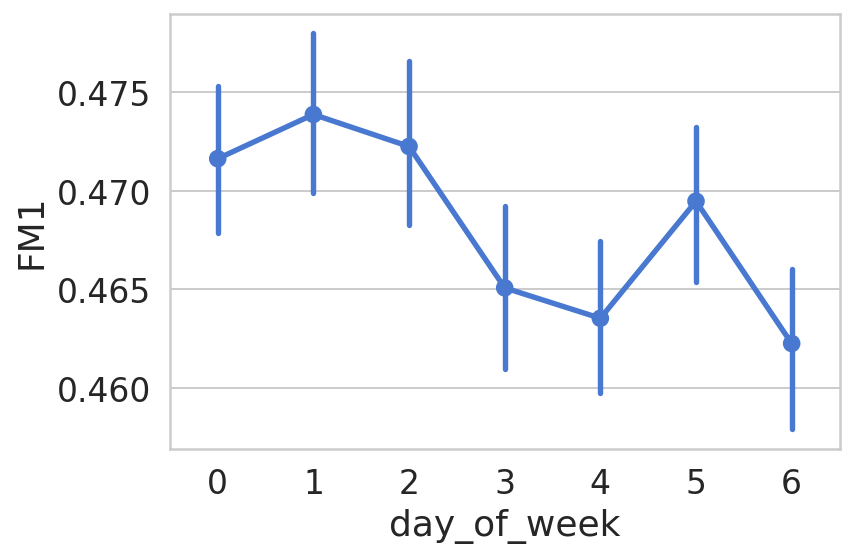

In [17]:
sns.pointplot(data=df,x = 'day_of_week',y='FM1');

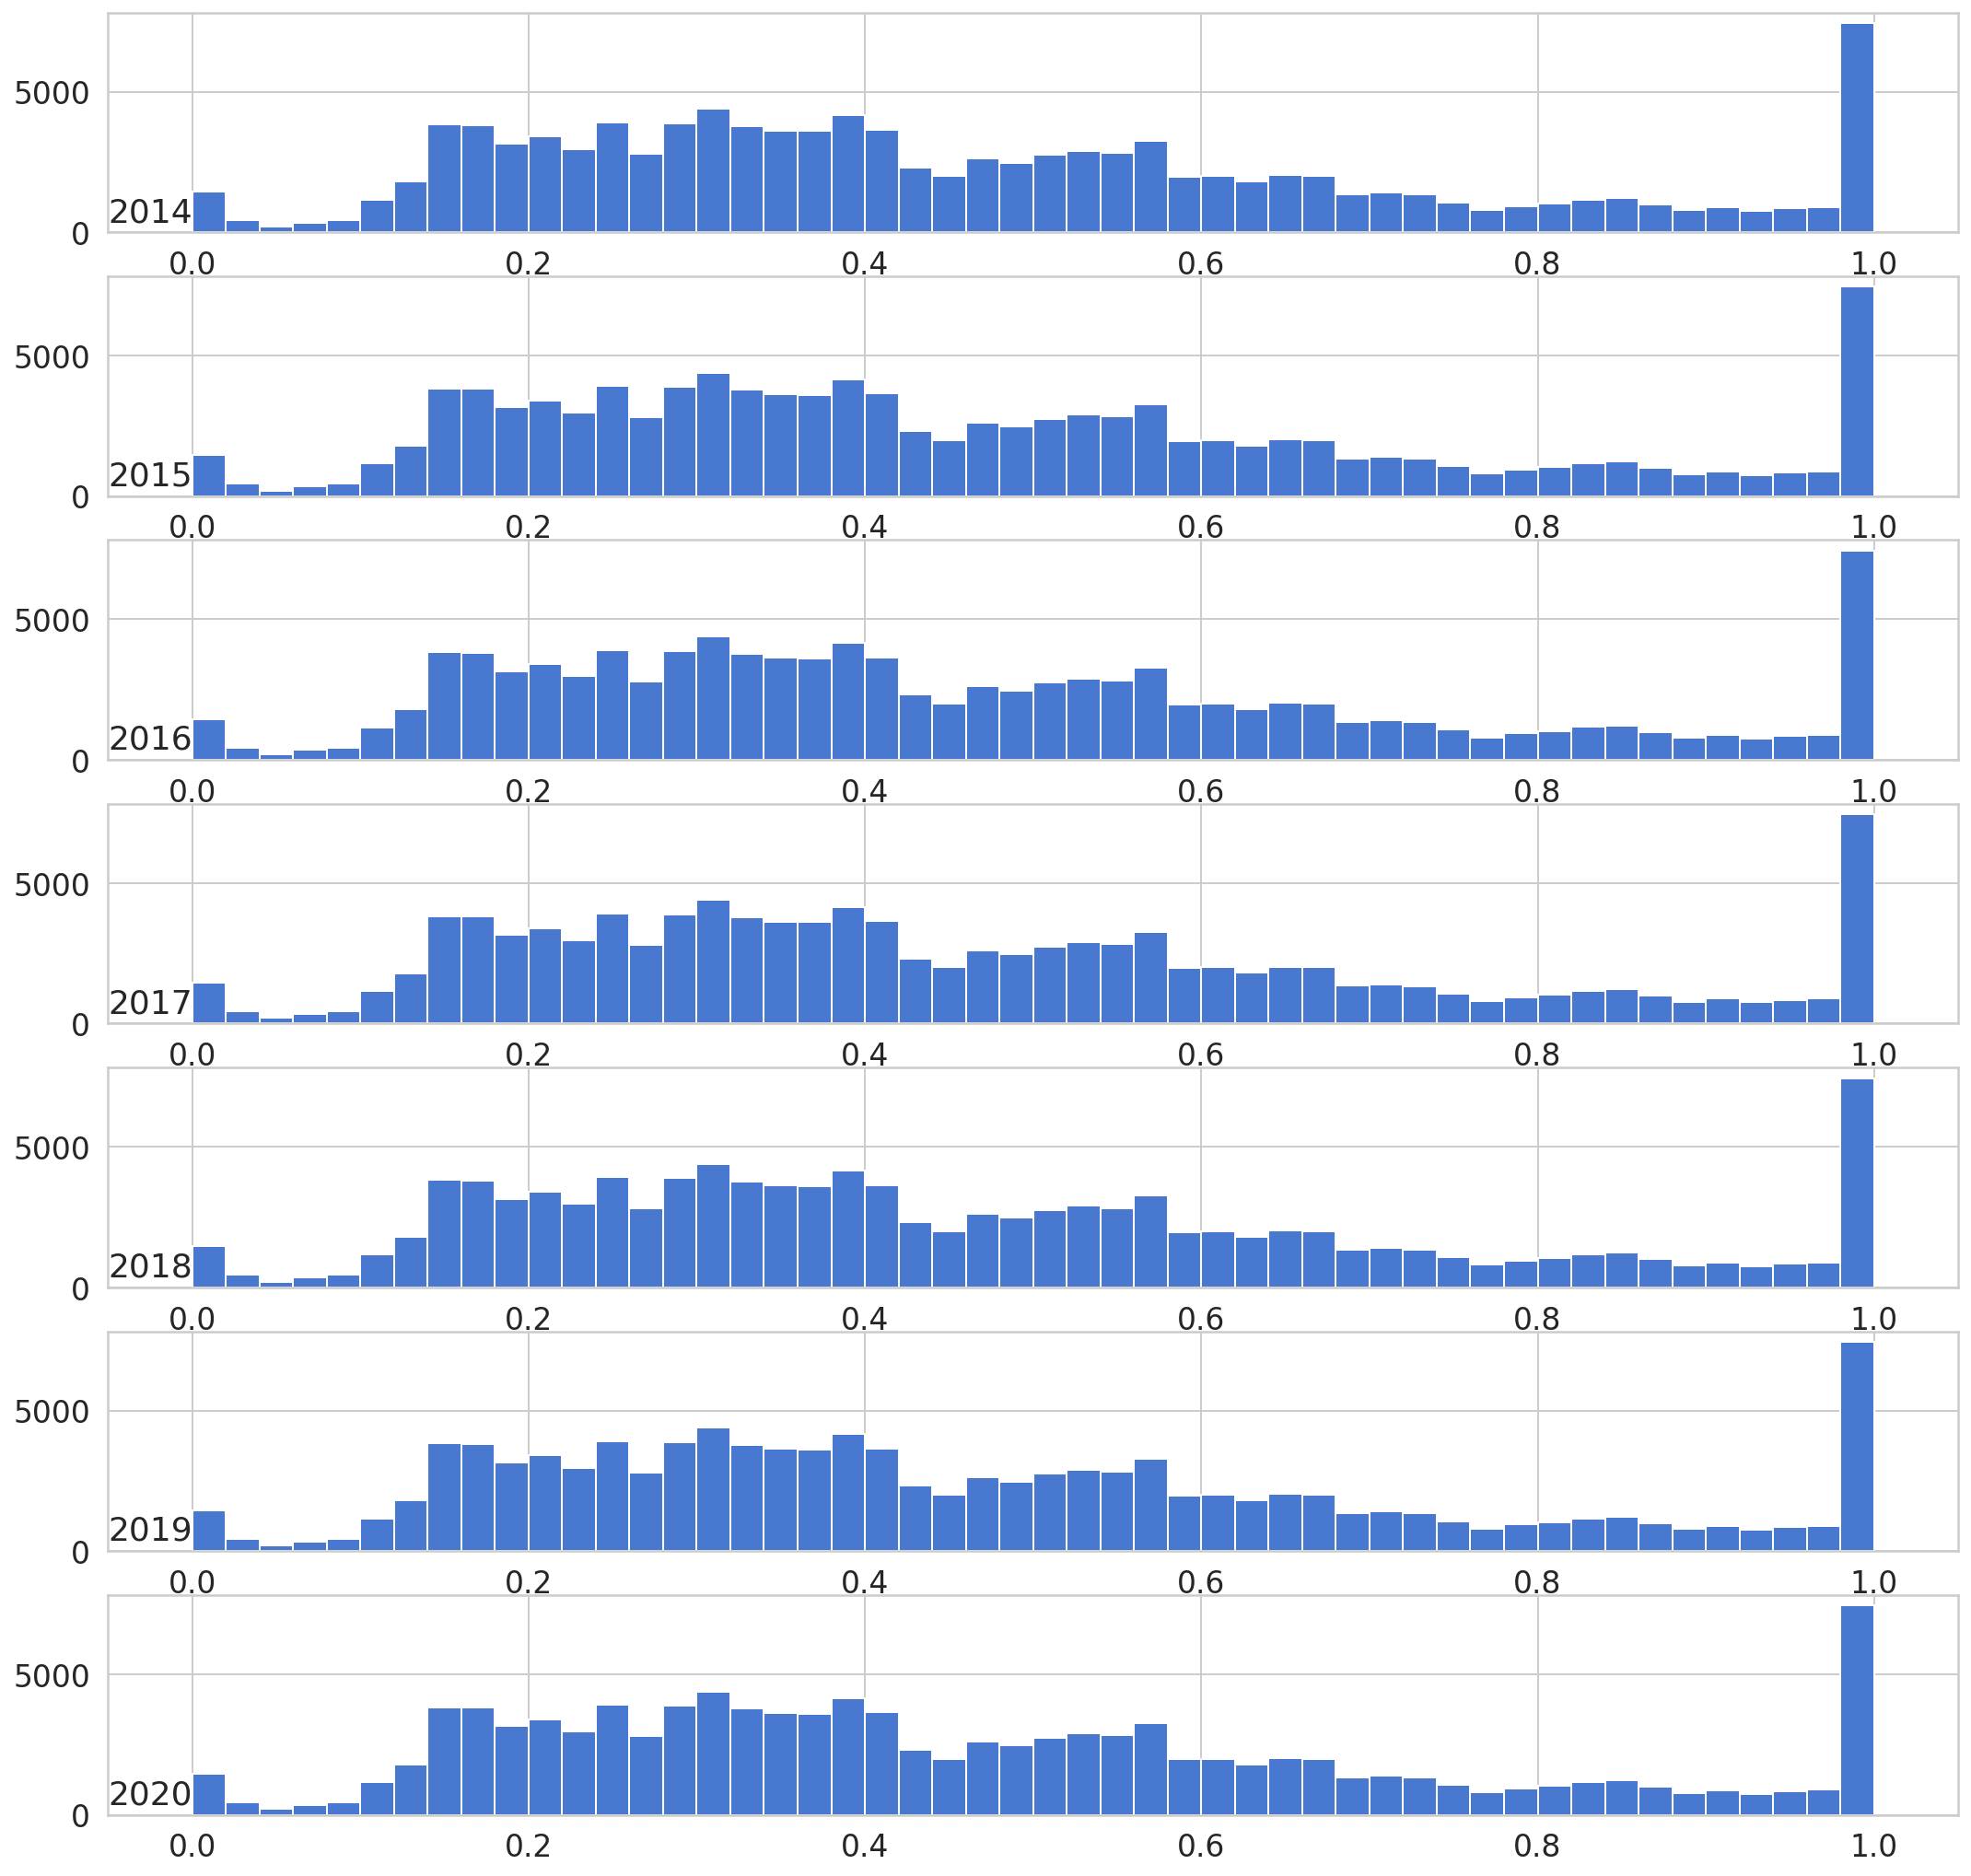

In [18]:
fig, ax = plt.subplots(figsize=(18,18))
years = ['2014','2015','2016','2017','2018','2019','2020']
for i in range(len(years)):
  plt.subplot(len(years),1,i+1)
  year = years[i]
  Flow_meter = df[str(year)]
  df['FM1'].hist(bins = 50)
  plt.title(str(year),y=0,loc='left')
plt.show()
fig.tight_layout()

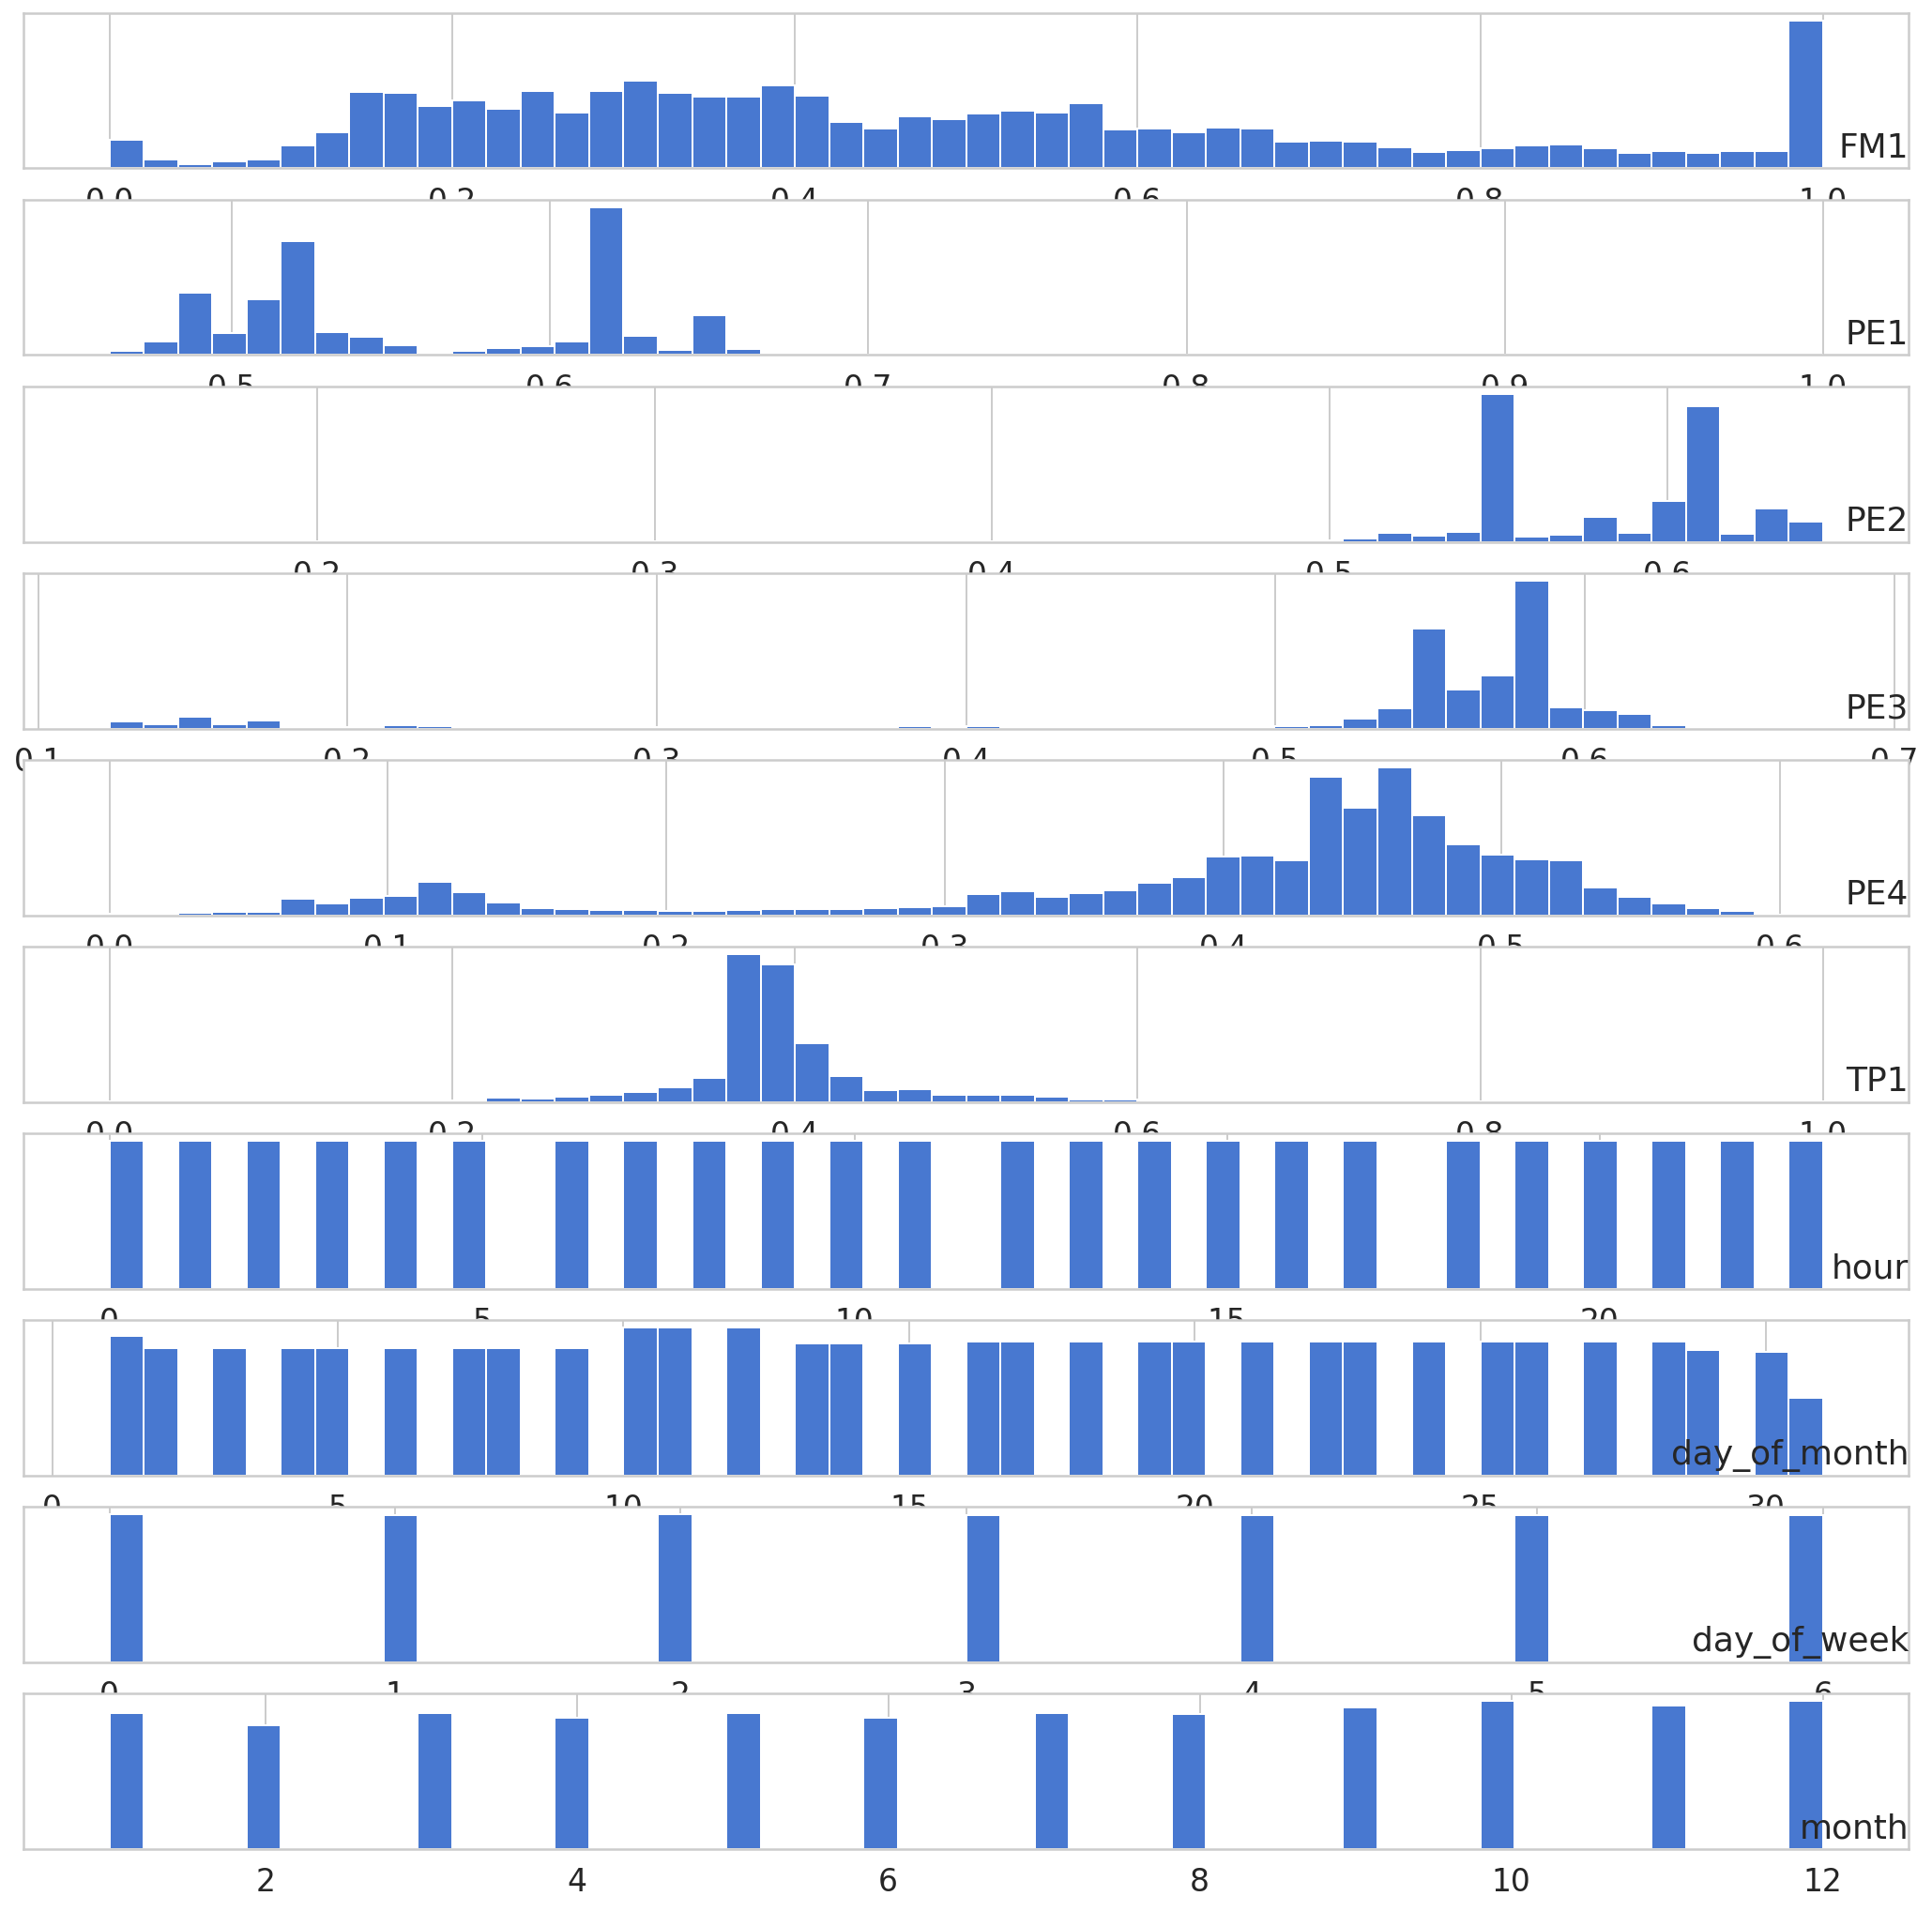

In [19]:
fig,ax = plt.subplots(figsize=(18,18))

for i in range(len(df.columns)):
  plt.subplot(len(df.columns),1,i+1)
  name = df.columns[i]
  df[name].hist(bins=50)
  plt.title(name,y=0,loc='right')
  plt.yticks([])
plt.show()
fig.tight_layout()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


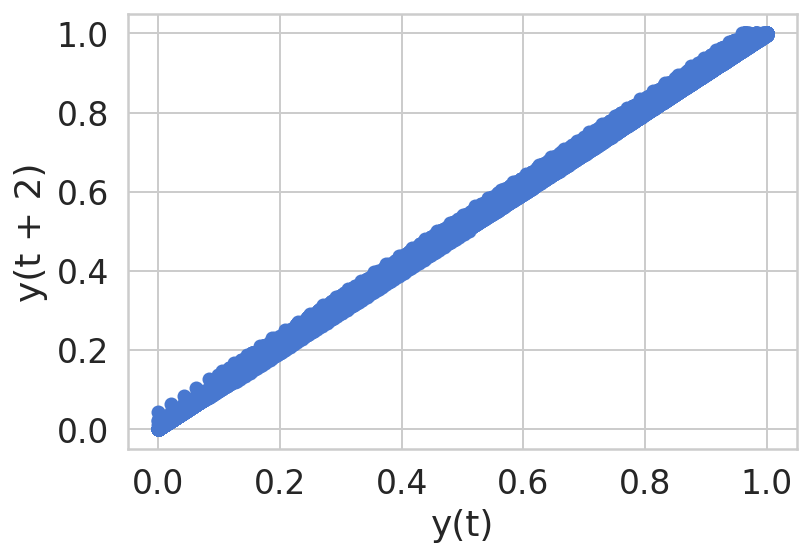

In [20]:
pd.plotting.lag_plot(df['FM1'],lag = 2);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


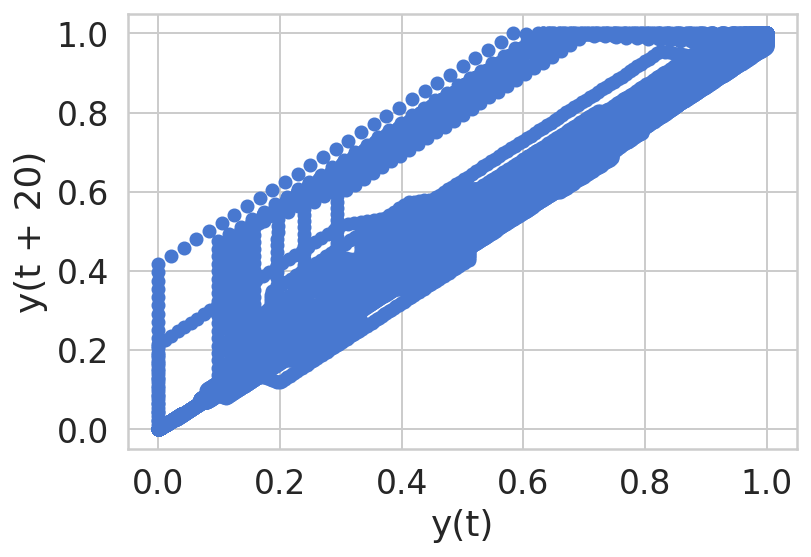

In [21]:
pd.plotting.lag_plot(df['FM1'],lag = 20);   ##10 hrs

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


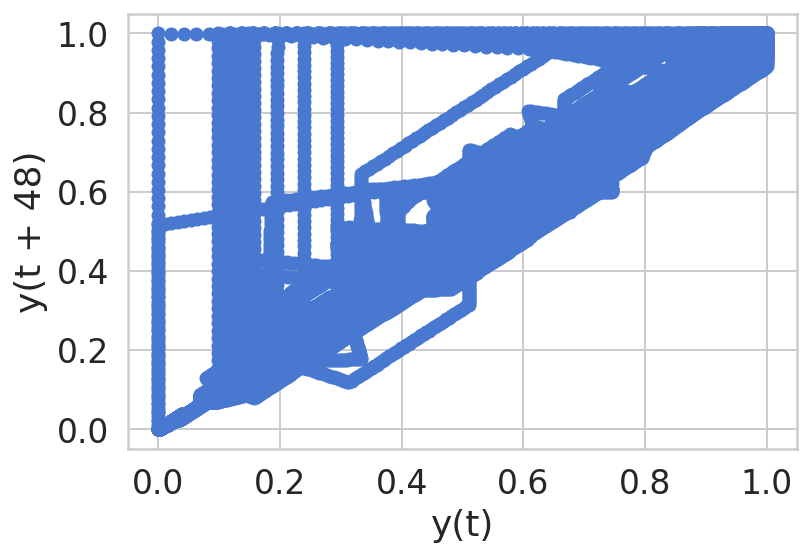

In [22]:
pd.plotting.lag_plot(df['FM1'],lag = 48);